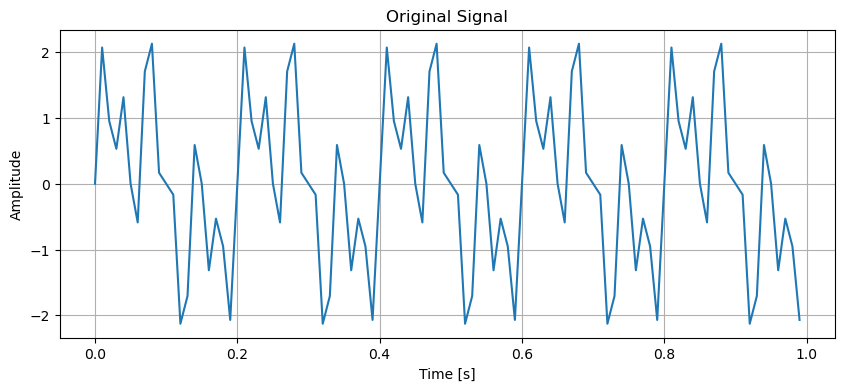

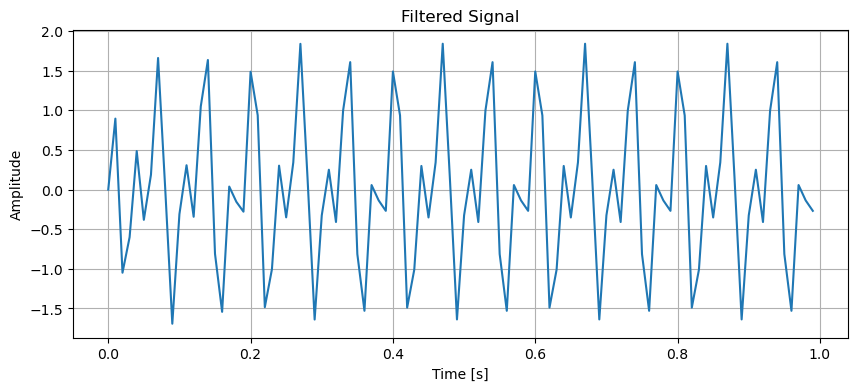

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter

# Step 1: Create the signal
fs = 100  # Sampling rate
t  = np.arange(0, 1, 1/fs)  # Time vector
s = np.sin(2 * np.pi * 5 * t) + np.sin(2 * np.pi * 15 * t) + np.sin(2 * np.pi * 30 * t)

# Plot the original signal
plt.figure(figsize=(10, 4))
plt.plot(t, s)
plt.title('Original Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

# Step 2: Design an IIR filter
def butter_bandstop_filter(data, lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, low, btype='highpass')
    y = lfilter(b, a, data)
    return y

# Step 3: Apply the IIR filter to suppress frequencies of 5 Hz and 30 Hz
filtered_signal = butter_bandstop_filter(s, 10, 25, fs)

# Plot the filtered signal
plt.figure(figsize=(10, 4))
plt.plot(t, filtered_signal)
plt.title('Filtered Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

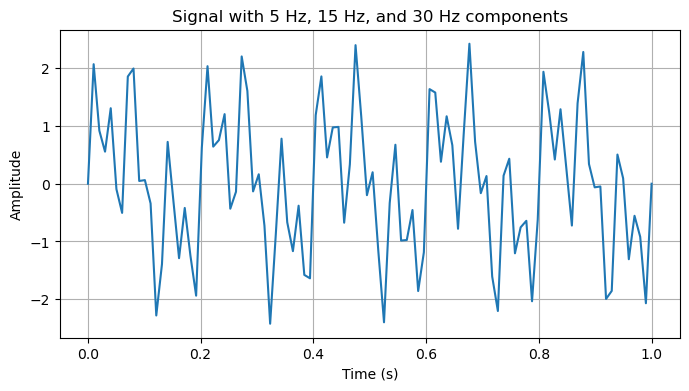

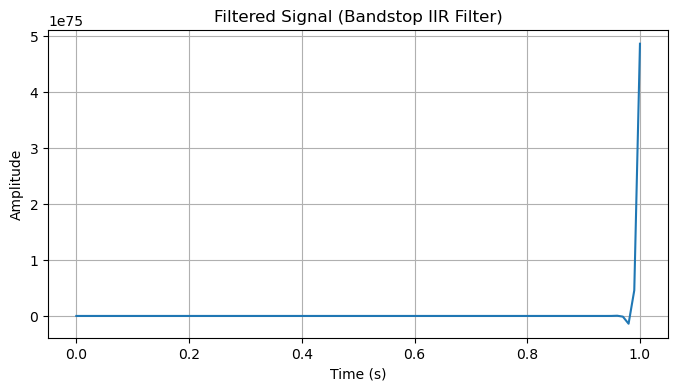

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
fs = 100  # Sampling rate (Hz)
duration = 1  # Duration of the signal (seconds)
t = np.linspace(0, duration, fs * duration)  # Time vector

# Sinusoidal components
f1 = 5  # Frequency of the first sinusoid (5 Hz)
f2 = 15  # Frequency of the second sinusoid (15 Hz)
f3 = 30  # Frequency of the third sinusoid (30 Hz)
s = np.sin(2 * np.pi * f1 * t) + np.sin(2 * np.pi * f2 * t) + np.sin(2 * np.pi * f3 * t)

# Plot the signal
plt.figure(figsize=(8, 4))
plt.plot(t, s)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Signal with 5 Hz, 15 Hz, and 30 Hz components')
plt.grid(True)
plt.show()

from scipy import signal

# Filter specifications
wp = [4, 6]  # Passband frequencies (Hz)
ws = [3, 7]  # Stopband frequencies (Hz)
Ap = 1  # Maximum passband ripple (dB)
As = 60  # Minimum stopband attenuation (dB)

# Compute filter order and cutoff frequency
N, wc = signal.buttord(wp, ws, Ap, As, analog=True)

# Design the filter
b, a = signal.butter(N, wc, btype='bandstop', analog=True)

# Apply the filter to the signal
filtered_signal = signal.lfilter(b, a, s)

# Plot the filtered signal
plt.figure(figsize=(8, 4))
plt.plot(t, filtered_signal)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Filtered Signal (Bandstop IIR Filter)')
plt.grid(True)
plt.show()

